In [1]:
#loading libraries
import platform; 
import sys;
import itertools
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from skimage import measure, morphology
%matplotlib inline
#loading libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sl
import matplotlib
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from skimage import measure, morphology


from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.metrics import geometric_mean_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
from catboost import CatBoostClassifier

import xgboost as xgb
import lightgbm as lgb

#fix random seed for reproducibility
RANDOM_STATE_VALUE = 1234

print("Python", sys.version)
print("NumPy", np.__version__)
print("SciPy", scipy.__version__)
print("Scikit-Learn", sl.__version__)
print("Matplotlib",matplotlib.__version__)

Python 3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]
NumPy 1.16.4
SciPy 1.3.0
Scikit-Learn 0.20.3
Matplotlib 2.0.0


In [2]:
#data pre-processing
INPUT_FOLDER = 'rennes_prostate_cancer/input_data/'
OUTPUT_FOLDER = 'rennes_prostate_cancer/output_results/'
data_main = pd.read_excel(INPUT_FOLDER+'data.xls', index_col=None)

In [3]:
data_main

,months,bleeded,36months,cohort,age,antticoagulant_i,hormono,dose_total in the prostate,"imrt_only (0=no, 1=yes)",imr_plus_igrt,...,pICA_dvh17,pICA_dvh18,pICA_dvh19,pICA_dvh20,PC1,PC2,PC3,FPC1,FPC2,FPC3
0,50.262295,0,0.0,1,69.000000,0.0,0.0,80,0,0,...,0.42928,0.50062,0.45737,0.52193,-97365.536099,-98340.898885,-99815.870178,82.397595,-16.953109,9.392584
1,55.573770,0,0.0,1,65.000000,0.0,0.0,76,0,0,...,0.52756,0.50154,0.30264,0.33254,-97478.992935,-98528.075671,-99648.477258,181.817534,-33.026130,16.459263
2,57.801913,0,0.0,1,74.000000,0.0,1.0,80,0,0,...,0.34757,0.46926,0.47247,0.53522,-97366.325249,-98350.682669,-99839.548606,37.097720,11.091180,63.368451
3,65.214481,0,0.0,1,74.000000,0.0,0.0,78,0,1,...,0.61983,0.50044,0.33423,0.26990,-97501.505217,-98506.011440,-99833.217137,146.059966,-54.208988,14.568327
4,63.673497,0,0.0,1,74.000000,0.0,1.0,78,0,1,...,0.22198,0.58777,0.71655,0.79550,-98015.927327,-98823.904649,-100403.880204,-25.172005,-3.803395,-9.333990
5,67.213115,0,0.0,1,58.000000,1.0,0.0,78,0,1,...,0.47468,0.48221,0.30929,0.39497,-97721.621698,-98657.388042,-100141.250383,53.533325,-35.942184,25.442532
6,59.934426,0,0.0,1,73.000000,0.0,0.0,78,0,1,...,0.55770,0.50107,0.36645,0.36386,-101144.368016,-101757.639478,-102336.941702,-74.044162,-82.859559,6.919612
7,64.984973,0,0.0,1,70.000000,0.0,1.0,78,0,1,...,0.29780,0.45043,0.48975,0.55603,-97864.444392,-98725.670807,-100306.711514,-30.433286,-6.821670,42.461075
8,62.360656,0,0.0,1,66.000000,1.0,0.0,78,0,1,...,0.43204,0.48193,0.42789,0.49034,-97462.839995,-98420.161717,-99964.278695,39.101115,-13.196303,42.881304
9,61.114754,0,0.0,1,70.000000,1.0,0.0,78,0,1,...,0.53520,0.49815,0.37521,0.43916,-99585.732997,-100260.196769,-101220.365280,-70.068191,-63.175211,10.754144


In [4]:
#data pre-processing
INPUT_FOLDER = 'rennes_prostate_cancer/input_data/'
OUTPUT_FOLDER = 'rennes_prostate_cancer/output_results/'
data_main = pd.read_excel(INPUT_FOLDER+'data.xls', index_col=None)

conditions = [
    (data_main['months'] < 36) & (data_main['bleeded']== 1.00)]
choices = [1.00]

data_main['36months'] = np.select(conditions, choices, default=0.00)

In [6]:
del data_main['months']
del data_main['bleeded']

In [10]:
data_main.head(5)
#data_main.to_csv(OUTPUT_FOLDER+'prepared_dataset_ronrick.csv', encoding='utf-8', index=False) 


,36months,cohort,age,antticoagulant_i,hormono,dose_total in the prostate,"imrt_only (0=no, 1=yes)",imr_plus_igrt,V0,V1= Volume of the rectum in % receiving a minimum of 1 Gy,...,pICA_dvh17,pICA_dvh18,pICA_dvh19,pICA_dvh20,PC1,PC2,PC3,FPC1,FPC2,FPC3
0,0.0,1,69.0,0.0,0.0,80,0,0,100.0,100.0,...,0.42928,0.50062,0.45737,0.52193,-97365.536099,-98340.898885,-99815.870178,82.397595,-16.953109,9.392584
1,0.0,1,65.0,0.0,0.0,76,0,0,100.0,100.0,...,0.52756,0.50154,0.30264,0.33254,-97478.992935,-98528.075671,-99648.477258,181.817534,-33.026130,16.459263
2,0.0,1,74.0,0.0,1.0,80,0,0,100.0,100.0,...,0.34757,0.46926,0.47247,0.53522,-97366.325249,-98350.682669,-99839.548606,37.097720,11.091180,63.368451
3,0.0,1,74.0,0.0,0.0,78,0,1,100.0,100.0,...,0.61983,0.50044,0.33423,0.26990,-97501.505217,-98506.011440,-99833.217137,146.059966,-54.208988,14.568327
4,0.0,1,74.0,0.0,1.0,78,0,1,100.0,100.0,...,0.22198,0.58777,0.71655,0.79550,-98015.927327,-98823.904649,-100403.880204,-25.172005,-3.803395,-9.333990


In [364]:
#data pre-processing
INPUT_FOLDER = 'rennes_prostate_cancer/input_data/'
OUTPUT_FOLDER = 'rennes_prostate_cancer/output_results/'
data_main = pd.read_excel(INPUT_FOLDER+'data.xls', index_col=None)

conditions = [
    (data_main['months'] < 36) & (data_main['bleeded']== 1.00)]
choices = [1.00]

data_main['36months'] = np.select(conditions, choices, default=0.00)

#data_main.to_csv(OUTPUT_FOLDER+'prepared_dataset.csv', encoding='utf-8', index=False) un comment if you want something else

train_data = data_main[data_main.cohort== 1]
test_data= data_main[data_main.cohort== 2]
print('Train Data: ' ,len(train_data))
print('Test Data: ' ,len(test_data))

from sklearn.utils import shuffle
train_data = shuffle(train_data)
test_data = shuffle(test_data)

#preparing training set
train_X = train_data.iloc[:,0:90].astype(float)
#train_temp_y = train_X.iloc[:,2].astype(float)
#target_train_X = train_data['36months']
#print('Labels of Trained data: ',len(train_temp_y))
#del train_X['36months']
del train_X['cohort']
del train_X['months']
del train_X['bleeded']
train_X.head()
#train_X.to_csv(OUTPUT_FOLDER+'prepared_dataset_test.csv', encoding='utf-8', index=False) #un comment if you want something else

#preparing testing set
test_X = test_data.iloc[:,0:90].astype(float)
test_temp_y = test_X.iloc[:,2].astype(float)
#target_test_X = test_data['36months']
#print('Labels of Test data: ' , len(test_temp_y))
#del test_X['36months']
del test_X['cohort']
del test_X['months']
del test_X['bleeded']
test_X.head()

target_train = train_X['36months']
target_test = test_X['36months']

train_set_labels = train_X.pop('36months')
test_set_labels = test_X.pop('36months')

Train Data:  337
Test Data:  254


In [365]:
test_X.head(2)

,age,antticoagulant_i,hormono,dose_total in the prostate,"imrt_only (0=no, 1=yes)",imr_plus_igrt,V0,V1= Volume of the rectum in % receiving a minimum of 1 Gy,V2,V3,...,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79
471,75.336986,1.0,1.0,80.0,0.0,1.0,100.0,99.998039,99.996078,99.994118,...,8.4900,7.23000,5.74000,4.12000,2.50000,1.080000,0.330000,0.078000,0.010000,0.0
513,56.000000,0.0,0.0,80.0,0.0,1.0,100.0,100.000000,100.000000,100.000000,...,10.9548,7.79115,4.69258,2.66753,1.44763,0.683149,0.276513,0.081327,0.024398,0.0


In [227]:
#plot values generated by SMOTE
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    
def convert_to_encoding(target_y):
    data_encoder = LabelEncoder()
    data_encoder.fit(target_y)
    encoded_y = data_encoder.transform(target_y)
    return encoded_y

def do_sampling_smote(train_X,target_Y,sampling_strategy = 'not minority',smoteenn=True):
    if smoteenn:
        smot_sampler = SMOTEENN(random_state=RANDOM_STATE_VALUE)
        X_res, Y_res = smot_sampler.fit_resample(train_X, convert_to_encoding(target_Y))
    else:
        #no_value=True
        smot_sampler= SMOTE(random_state=RANDOM_STATE_VALUE)
        #smot_sampler= BorderlineSMOTE(sampling_strategy=sampling_strategy,random_state=RANDOM_STATE_VALUE)
        #smot_sampler = RandomOverSampler(random_state=RANDOM_STATE_VALUE)
        X_res, Y_res = smot_sampler.fit_resample(train_X, convert_to_encoding(target_Y))
    return X_res,Y_res

        
    
def set_ggplot_style():
    plt.style.use('ggplot')
    
def list_of_styles():
    print(plt.style.available)

    
def view_tabular_feature_importances():
    pass

def set_plot_size(width,height):
    plt.rcParams['figure.figsize'] = [width,height]
    
def do_lgb_on_sampled_data(train_X,train_Y,regression=True):
    if regression:
        gbm = lgb.LGBMRegressor()
    else:
        #gbm = lgb.LGBMClassifier(class_weight='balanced')
        #gbm = lgb.LGBMClassifier(scale_pos_weight=1.5)
        gbm = lgb.LGBMClassifier()
    return gbm.fit(train_X, train_Y)

def do_xgb_on_sampled_data(train_X,train_Y,regression=True):
    if regression :
        print("TO DO")
    else:
        xgb_tuned = xgb.XGBClassifier(max_depth=20, n_estimators=200,min_child_weight= 1, learning_rate=0.2,subsample=0.6,
colsample_bytree=0.8,gamma=1,eval_metric='logloss',scale_pos_weight=1.8)
    return xgb_tuned.fit(train_X, train_Y)

def do_random_forest():
    rf_grid_searched_dose = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)
    rf_vanila_dose = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE_VALUE, n_jobs=-1)
    return rf_vanila_dose

def do_catboost_on_sampled_data(train_X,train_Y,regression=True):
    if regression:
        print("TO DO ")
    else :
        #model_cat = CatBoostClassifier(eval_metric='BalancedAccuracy',use_best_model=True,random_seed=1234)
        model_cat = CatBoostClassifier(eval_metric='BalancedAccuracy',random_seed=1234)
    return model_cat.fit(train_X, train_Y)   
        
def create_confusion_matrix(predictions,target_y):
    encoded_y = convert_to_encoding(target_y) 
    cm = confusion_matrix(encoded_y, predictions)
    return cm,encoded_y
    
def predict_and_create_cm(model,target_x,target_y):
    encoded_y = convert_to_encoding(target_y) 
    predictions = model.predict(target_x)
    cm = confusion_matrix(encoded_y, predictions)
    return cm,predictions,encoded_y


#calculcate sensitivity and specificity
def calculate_custom_sensitivity(cm):
    tp = cm[1,1]
    tn = cm[0,0]
    fp= cm[0,1]
    fn=cm[1,0]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = tp/(tp+fn)
    # Specificity or true negative rate
    TNR = tn/(tn+fp)
    return TPR,TNR

#calculate 
def plot_confusion_matrix_with_report(cm, classes,ax,bc,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('')
    
    #calculate sensitivity and specificity
    sensitivity,specificity= calculate_custom_sensitivity(cm)
 
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label\n bac={:0.2f};sen={:0.2f}:spe={:0.2f}'.format(bc,round(sensitivity,2),round(specificity,2))) 
    ax.grid(False)



def apply_heuristics_on_generate_data(generated_data_x,generated_data_y,columns_list,train_dummy_X,test_dummy_X,target_train,target_test):
    data_frame_generated = pd.DataFrame(generated_data_x,columns=columns_list)
    data_frame_generated['36months'] = generated_data_y
    
    train_dummy_X['36months'] = target_train
    test_dummy_X['36months'] = target_test
    
    merged_dataframe_test = pd.concat([data_frame_generated, test_dummy_X]) 
    merged_dataframe_test.drop_duplicates(keep=False, inplace=True)
  
    
    merged_dataframe_train = pd.concat([train_dummy_X, merged_dataframe_test]) 
    
    return data_frame_generated,merged_dataframe_test,merged_dataframe_train
 
def get_single_count_from_data_frame (df,variable_name):
    no_,yes_ = df[variable_name].value_counts()
    return no_,yes_

def apply_pseudo_labeling(model,target_X,proba_score,train_X,train_Y):
    predictions_in_probability = predict_proba_model(model,target_X)
    predictions_in_probability_modified = (predictions_in_probability [:,1] >= proba_score).astype('int')
    prediction_dataframe = pd.DataFrame(predictions_in_probability_modified,columns=['36months'])
    augmented_test = target_X.copy(deep=True)
    augmented_test['36months'] = predictions_in_probability_modified
    
    
    augmented_test_label= augmented_test['36months']
    augmented_set_labels = augmented_test.pop('36months')
    new_train_X = np.vstack((train_X, augmented_test.values))
    new_train_Y = np.concatenate((train_Y, augmented_test_label.values), axis=0)
    
    return prediction_dataframe,augmented_test,new_train_X,new_train_Y

def create_merged_data_frame(model,target_X,proba_score,generated_data_x,generated_data_y,columns_list,is_xgb):
    if is_xgb:
        test_X_matrix = target_X.as_matrix()
        predictions_in_probability = predict_proba_model(model,test_X_matrix)
    else :
        predictions_in_probability = predict_proba_model(model,target_X)
        
    predictions_in_probability_modified = (predictions_in_probability [:,1] >= proba_score).astype('int')
    prediction_dataframe = pd.DataFrame(predictions_in_probability_modified,columns=['36months'])
    augmented_test = target_X.copy(deep=True)
    augmented_test['36months'] = predictions_in_probability_modified
    
    data_frame_generated = pd.DataFrame(generated_data_x,columns=columns_list)
    data_frame_generated['36months'] = generated_data_y
    
    merged_dataframe_train = pd.concat([data_frame_generated, augmented_test])
    
    return merged_dataframe_train    
    
    
def predict_proba_model(model,target_X):
    predictions_probability = model.predict_proba(target_X)
    return predictions_probability

def pop_labels(dataframe,label_name):
    dataframe_label = dataframe[label_name]
    dataframe.pop(label_name)
    return dataframe,dataframe_label

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


def merge_dataframe_only(list_of_dfs):
    merged =pd.concat(list_of_dfs) 
    merged.drop_duplicates(keep='first', inplace=True)
    merged = clean_dataset(merged)
    return shuffle(merged)

def find_best_cut_off(true_Y,predicted_y):
    fpr, tpr, thresholds = roc_curve(true_Y,predicted_y[:,1],pos_label=1)
    optimal_idx=np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

def draw_roc_curve(Y,probs,title):
    # Perforamnce of the model
    fpr, tpr, thresholds = roc_curve(Y,probs,pos_label=1)
    #print('tpr: ', tpr)
    roc_score = roc_auc_score (Y,probs)
    AUC  = auc(fpr, tpr)
    print ('The AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' %title)
    plt.legend(loc="lower right")
    plt.show()

def prepare_data_set_cox_analysis_and_classification(data_main):
    train_data_temp = data_main[data_main.cohort== 1]
    test_data_temp= data_main[data_main.cohort== 2]
    
    print('Procesing Train Data for cox analysis and classification :' ,len(train_data_temp))
    print('Procesing Test Data: for cox analysis and classification :' ,len(test_data_temp))

    train_data_temp = shuffle(train_data_temp)
    test_data_temp = shuffle(test_data_temp)

    test_data_temp['36months']= test_data_temp['36months'].astype('bool')

    train_X_temp = train_data_temp.iloc[:,0:90].astype(float)
    train_temp_y = train_data_temp.iloc[:,2].astype(float)
    
    del train_X_temp['36months']
    del train_X_temp['cohort']
    del train_X_temp['bleeded']

    test_X_temp = test_data_temp.iloc[:,0:90].astype(float)
    test_temp_y = test_data_temp.iloc[:,[0,2]]
    
    del test_X_temp['36months']
    del test_X_temp['months']
    del test_X_temp['cohort']
    del test_X_temp['bleeded']
    
    return train_X_temp,train_temp_y,test_X_temp,test_temp_y


def create_data_set_for_cox_and_classification_after_smote (X_res_train_temp,Y_res_train_temp,columns_list):
    data_frame_generated = pd.DataFrame(X_res_train_temp,columns=columns_list)
    data_frame_generated['36months'] = Y_res_train_temp
    data_frame_cox_target = data_frame_generated.iloc[:,[0,87]]
    #del data_frame_generated['months']
    return data_frame_generated,data_frame_cox_target


def plot_feature_importances(model,feature_names,number_of_features,title):
    plt.rcParams['figure.figsize'] = [10,8]
    feat_importances = pd.Series(model.feature_importances_, index=feature_names.columns)
    feat_importances.nlargest(20).plot(kind='barh',color=colors)
    plt.title('First {} Important Features for {}'.format(number_of_features, title) , fontsize = 20)
    plt.yticks(fontsize = 10)
    plt.ylabel('Name of the features',fontsize = 20)
    
    
#helper function to generate color palette
import random

def get_random_color(pastel_factor = 0.7):
    return [(x+pastel_factor)/(1.0+pastel_factor) for x in [random.uniform(0,1.0) for i in [1,2,3]]]

def color_distance(c1,c2):
    return sum([abs(x[0]-x[1]) for x in zip(c1,c2)])

def generate_new_color(existing_colors,pastel_factor = 0.5):
    max_distance = None
    best_color = None
    for i in range(0,100):
        color = get_random_color(pastel_factor = pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color,c) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color

colors = []
for i in range(0,30):
    colors.append(generate_new_color(colors,pastel_factor = 0.8))
    
def get_important_features_list (model,columns_list,num_of_features):
    feat_importances = pd.Series(model.feature_importances_, index=columns_list)
    df=feat_importances.nlargest(num_of_features)
    important_features_list = []
    
    for i, v in df.items():
        important_features_list.append(i)
    return important_features_list

    

In [366]:
train_prep_X,train_prep_y,test_cox_X,test_cox_y = prepare_data_set_cox_analysis_and_classification(data_main)
train_prep_X.head(2)

X_res_train_temp,Y_res_train_temp = do_sampling_smote(train_prep_X,train_prep_y,sampling_strategy = 'not minority',smoteenn=True)
print('Resampled dataset shape for training set:  %s' % Counter(Y_res_train_temp))

print('Preparing Training set after applying SMOTEENN')
data_frame_train_X,data_frame_cox_target = create_data_set_for_cox_and_classification_after_smote(X_res_train_temp,Y_res_train_temp,train_prep_X.columns)
data_frame_target_train = data_frame_train_X['36months']
data_frame_train_set_labels = data_frame_train_X.pop('36months')

del data_frame_train_X['months']

data_frame_train_X.head(2)

Procesing Train Data for cox analysis and classification : 337
Procesing Test Data: for cox analysis and classification : 254
Resampled dataset shape for training set:  Counter({1: 310, 0: 299})
Preparing Training set after applying SMOTEENN


,age,antticoagulant_i,hormono,dose_total in the prostate,"imrt_only (0=no, 1=yes)",imr_plus_igrt,V0,V1= Volume of the rectum in % receiving a minimum of 1 Gy,V2,V3,...,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79
0,74.553425,0.0,1.0,80.0,1.0,0.0,100.0,100.0,100.0,99.8687,...,9.76544,8.39075,6.96851,5.25299,2.58199,0.366456,0.000112,0.00000,0.0,0.0
1,59.202740,0.0,1.0,78.0,1.0,0.0,100.0,100.0,100.0,99.3470,...,6.13588,4.65325,4.00605,3.32358,2.58584,1.529630,0.428509,0.00925,0.0,0.0


In [280]:
#MERGE PREDICTIONS
#PSEUDO LABELING AND MERGING ONLY USING RF
merged_df_xgb= create_merged_data_frame(xgb_model_clf_train,test_X,0.5,data_frame_train_X,data_frame_target_train,data_frame_train_X.columns,True)
merged_df_xgb = shuffle(merged_df_xgb)
merged_df_xgb.drop_duplicates(keep='first', inplace=True)
merged_df_xgb.shape 


#PSEUDO LABELING AND MERGING ONLY USING RF
merged_df_rf = create_merged_data_frame(rf_,test_X,0.5,data_frame_train_X,data_frame_target_train,data_frame_train_X.columns,False)
merged_df_rf = shuffle(merged_df_rf)
merged_df_rf.drop_duplicates(keep='first', inplace=True)
merged_df_rf.shape 

list_of_dfs = [merged_df_rf,merged_df_xgb]
merged_df = merge_dataframe_only(list_of_dfs)

shuffle(merged_df)

#merged_df = merged_df_mv
print(merged_df.shape)

#no,yes = get_single_count_from_data_frame (merged_dataframe_three,'36months')
#print('No Toxicity: ',no)
#print('Toxicity: ',yes)

augmented_x,augmented_test_y = pop_labels(merged_df,'36months')
X_res_train_augmented,Y_res_train_augmented = do_sampling_smote(augmented_x,augmented_test_y,sampling_strategy = 'not minority',smoteenn=True)
#print(sorted(Counter(y_res).items()))
print('Resampled dataset shape for training set:  %s' % Counter(Y_res_train_augmented))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(893, 87)
Resampled dataset shape for training set:  Counter({1: 454, 0: 286})


Balanced Accuracy for RF:  49.0
MCC for RF:  -0.02252670965236165
ROC :  49.0
Confusion Matrix: 
[[205  27]
 [ 20   2]]
Sensitivity: 0.09: and Specificity:0.88

The AUC is : 0.4873


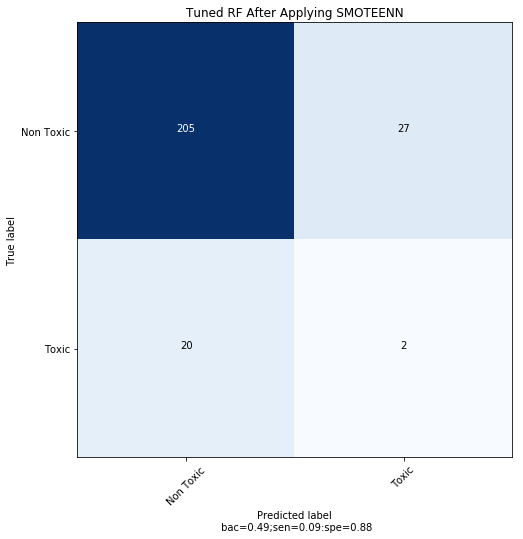

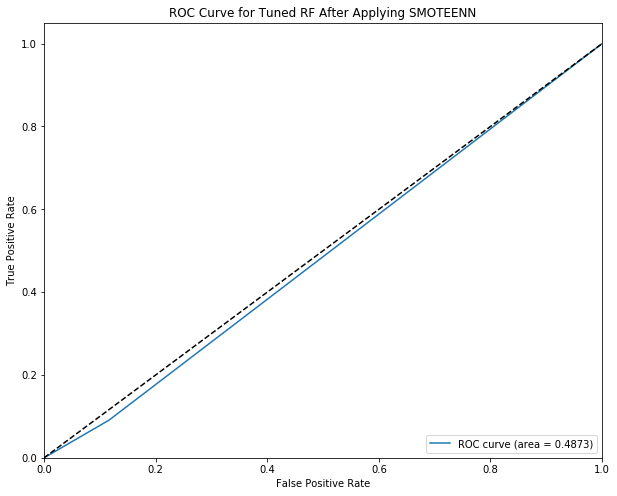

ROC :  0.4872648902821316


In [304]:
#rf_pseudo = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)

#rf_pseudo = RandomForestClassifier(n_estimators=500,max_depth=20,random_state=RANDOM_STATE_VALUE)
#rf_pseudo.fit(augmented_x, augmented_test_y)

#found on at the first step 
rf_pseudo= RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=3,min_samples_split=10,n_estimators=100,random_state=RANDOM_STATE_VALUE)

#params were found based on the merged dataframe
#rf_pseudo= RandomForestClassifier(bootstrap= True,criterion='entropy',max_features='auto',max_depth=20,min_samples_leaf=4,min_samples_split=8,n_estimators=100,random_state=RANDOM_STATE_VALUE)
#Best Params:  {'min_samples_leaf': 4, , 'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 20}
    
#params were found based on the augmentation of dataframe
#rf_pseudo= RandomForestClassifier(bootstrap= True,criterion='entropy',max_features='auto',max_depth=20,min_samples_leaf=5,min_samples_split=8,n_estimators=500,random_state=RANDOM_STATE_VALUE)
#{'min_samples_leaf': 5,  'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 20}
    
#rf_pseudo.fit(augmented_x, augmented_test_y)
rf_pseudo.fit(X_res_train_augmented,Y_res_train_augmented)

cm,predictions,test_Y = predict_and_create_cm(rf_pseudo,test_X,target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
print(cm)
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned RF After Applying SMOTEENN')

draw_roc_curve(test_Y,predictions,'Tuned RF After Applying SMOTEENN')
roc_score = roc_auc_score (test_Y,predictions)
print('ROC : ' , roc_score)



Optimal cut-off value: 0.05
Balanced Accuracy for RF:  62.0
MCC for RF:  0.13252438894192922
ROC :  62.0
Confusion Matrix: 
Sensitivity: 0.77: and Specificity:0.46

The AUC is : 0.6170


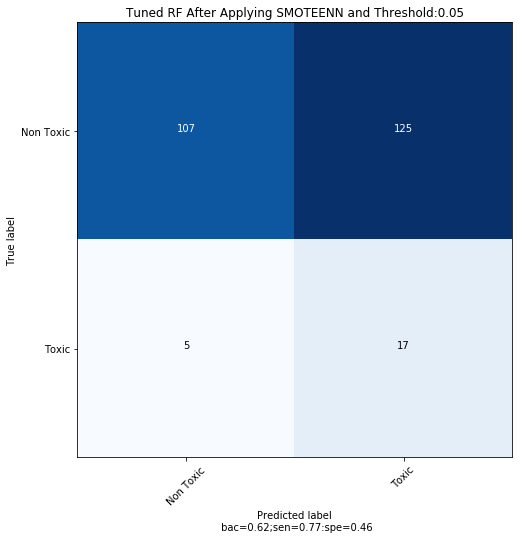

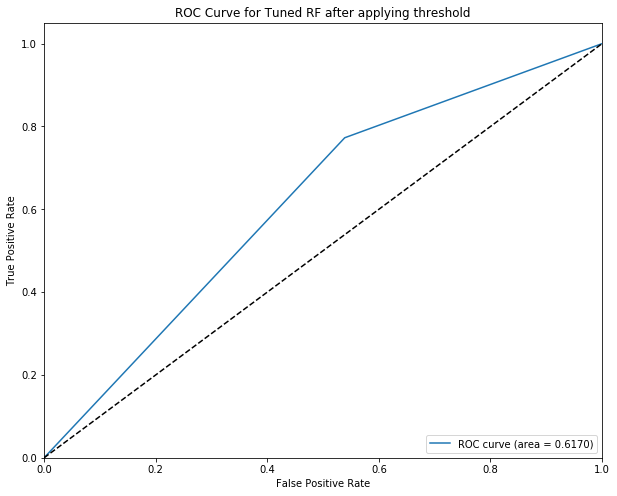

In [305]:
test_Y = convert_to_encoding(target_test) 
probs_rf_grid_searched_dose_thres = predict_proba_model(rf_pseudo,test_X)
threshold = round(find_best_cut_off(test_Y,probs_rf_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)

predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')

cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)


balanced_accuracy = recall_score(test_Y,predicted_grid_searched_dose_thres, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))


fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned RF After Applying SMOTEENN and Threshold:'+str(threshold))

draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned RF after applying threshold')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Balanced Accuracy for XGB:  48.0
MCC for RF:  -0.02871255298678349
ROC :  48.0
Confusion Matrix: 
[[180  52]
 [ 18   4]]
Sensitivity: 0.18: and Specificity:0.78

The AUC is : 0.4788


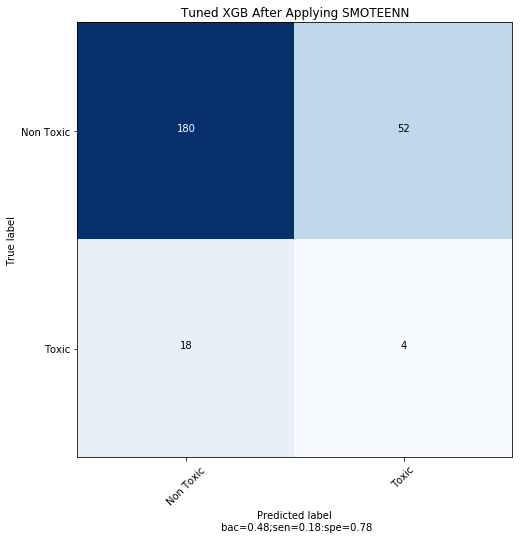

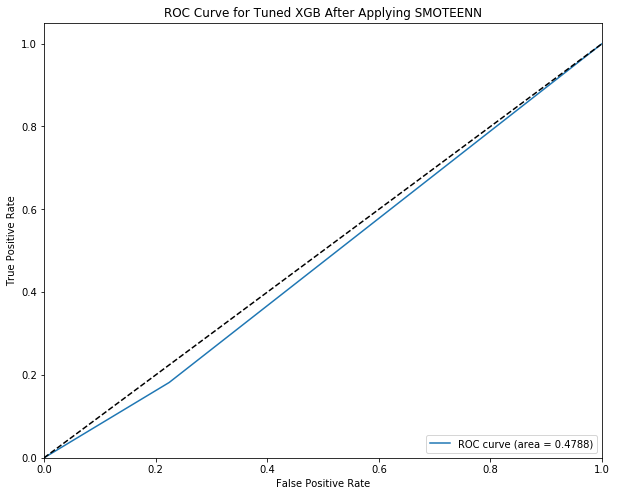

ROC :  0.47884012539184956


In [240]:
#xgb_pseudo = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)
test_X_matrix = test_X.as_matrix()
#xgb_pseudo = xgb.XGBClassifier(max_depth=20, n_estimators=200,min_child_weight= 1, learning_rate=0.2,subsample=0.6,
#colsample_bytree=0.8,gamma=1,eval_metric='auc')

xgb_pseudo = = xgb.XGBClassifier(max_depth=20, n_estimators=400,min_child_weight= 1, learning_rate=0.02,subsample=0.6,
colsample_bytree=0.6,gamma=0.5,eval_metric='auc',scale_pos_weight=1.8)


xgb_pseudo.fit(augmented_x.as_matrix(), augmented_test_y)
#xgb_pseudo.fit(X_res_train_augmented, Y_res_train_augmented)
#rf_pseudo.fit(X_res_train_augmented,Y_res_train_augmented)
cm,predictions,test_Y = predict_and_create_cm(xgb_pseudo,test_X_matrix,target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for XGB: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
print(cm)
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN')

draw_roc_curve(test_Y,predictions,'Tuned XGB After Applying SMOTEENN')
roc_score = roc_auc_score (test_Y,predictions)
print('ROC : ' , roc_score)

Optimal cut-off value: 0.01
Balanced Accuracy for XGB:  60.0
MCC for RF:  0.11618817089249493
ROC :  60.0
Confusion Matrix: 
Sensitivity: 0.86: and Specificity:0.33

The AUC is : 0.5956


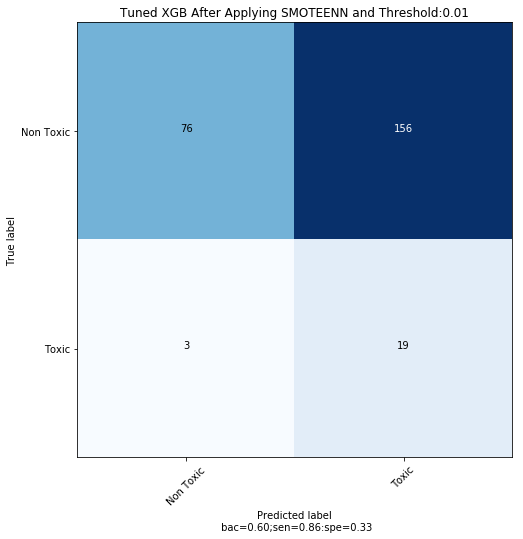

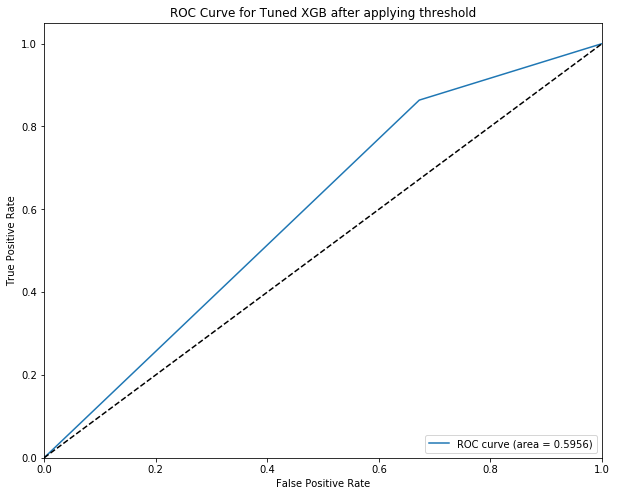

In [241]:
test_Y = convert_to_encoding(target_test) 
probs_xgb_grid_searched_dose_thres = predict_proba_model(xgb_pseudo,test_X_matrix)
threshold = round(find_best_cut_off(test_Y,probs_xgb_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)

predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')



cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)

balanced_accuracy = recall_score(test_Y,predicted_grid_searched_dose_thres, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for XGB: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN and Threshold:'+str(threshold))



draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned XGB after applying threshold')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Log Loss :  0.4662701358626325
Balanced Accuracy for MV:  48.0
MCC for MV:  -0.03573123719880505
ROC :  48.0
Confusion Matrix: 
[[201  31]
 [ 20   2]]
Sensitivity: 0.09: and Specificity:0.87
Optimal cut-off value: 0.03
Balanced Accuracy for MV:  65.0
MCC for RF:  0.17323188843853488
ROC :  65.0
Confusion Matrix: 
Sensitivity: 0.86: and Specificity:0.44

The AUC is : 0.6516


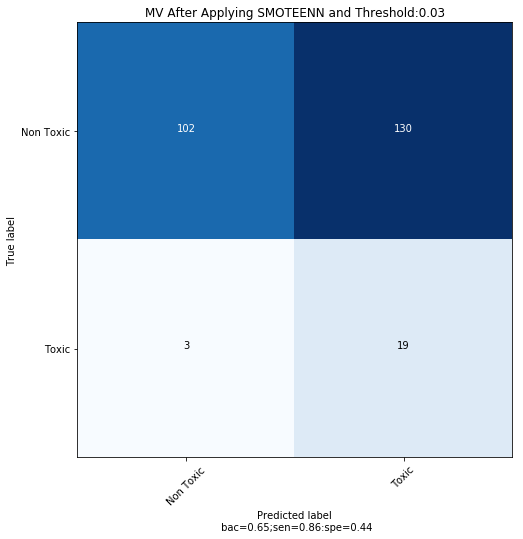

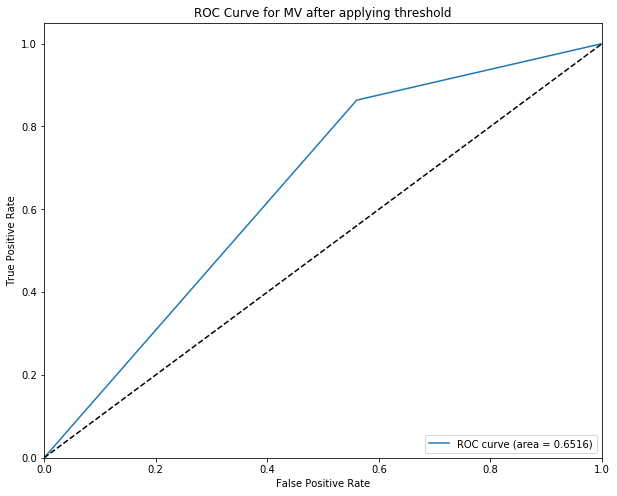

In [370]:
#MAJORITY VOTING SCHEME,

#APPLYING MAJORITY VOTING
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import log_loss

rf_clf1 = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)
xgb_clf2 = xgb.XGBClassifier(max_depth=20, n_estimators=250,min_child_weight= 1, learning_rate=0.2,subsample=0.6,
colsample_bytree=0.8,gamma=1,eval_metric='auc')


#params were found based on the months dataset generated

rf_clf1 = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=3,min_samples_split=10,n_estimators=100,random_state=RANDOM_STATE_VALUE)
xgb_clf2 = xgb.XGBClassifier(max_depth=20, n_estimators=400,min_child_weight= 1, learning_rate=0.02,subsample=0.6,
colsample_bytree=0.6,gamma=0.5,eval_metric='auc')

eclf = VotingClassifier(estimators=[
    ('rf_clf1', rf_clf1), ('xgb_clf2', xgb_clf2)],voting='soft',weights=[2,1]) #voting='soft'
#eclf.fit(data_frame_train_X.values, data_frame_target_train)
#eclf.fit(augmented_x.values, augmented_test_y)
eclf.fit(X_res_train_augmented, Y_res_train_augmented)
#X_res_train_augmented,Y_res_train_augmented


encoded_y = convert_to_encoding(target_test) 
y_val_pred = eclf.predict_proba(test_X.as_matrix())
print('Log Loss : ' ,log_loss(encoded_y, y_val_pred))

cm,predictions,test_Y = predict_and_create_cm(eclf,test_X.as_matrix(),target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for MV: ' , round(balanced_accuracy,2)*100)
print('MCC for MV: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
print(cm)
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))


test_Y = convert_to_encoding(target_test) 
probs_majority_grid_searched_dose_thres = predict_proba_model(eclf,test_X.as_matrix())
threshold = round(find_best_cut_off(test_Y,probs_majority_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)


#probs_rf_grid_searched_dose_thres = predict_proba_model(eclf,test_X.as_matrix())
probs_majority_grid_searched_dose_thres = (probs_majority_grid_searched_dose_thres [:,1] >= threshold).astype('int')



cm = confusion_matrix(test_Y, probs_majority_grid_searched_dose_thres)

balanced_accuracy = recall_score(test_Y,probs_majority_grid_searched_dose_thres,average='macro') 
mcc_coef= matthews_corrcoef(test_Y, probs_majority_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,probs_majority_grid_searched_dose_thres)

print('Balanced Accuracy for MV: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='MV After Applying SMOTEENN and Threshold:'+str(threshold))



draw_roc_curve(test_Y,probs_majority_grid_searched_dose_thres,'MV after applying threshold')


In [356]:
#PSEUDO LABELING AND MERGING ONLY USING MV
merged_df_mv= create_merged_data_frame(eclf,test_X,0.5,data_frame_train_X,data_frame_target_train,data_frame_train_X.columns,True)
merged_df_mv = shuffle(merged_df_mv)
merged_df_mv.drop_duplicates(keep='first', inplace=True)
merged_df_mv.shape 


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(863, 87)

In [357]:

#merged data frame 
list_of_dfs = [merged_df_xgb]
#merged_df = merge_dataframe_only(list_of_dfs)

#merged_df = merged_df_mv
#print(merged_df.shape)

#no,yes = get_single_count_from_data_frame (merged_dataframe_three,'36months')
#print('No Toxicity: ',no)
#print('Toxicity: ',yes)

augmented_x,augmented_test_y = pop_labels(merged_df_mv,'36months')
X_res_train_augmented,Y_res_train_augmented = do_sampling_smote(augmented_x,augmented_test_y,sampling_strategy = 'not minority',smoteenn=True)
#print(sorted(Counter(y_res).items()))
print('Resampled dataset shape for training set:  %s' % Counter(Y_res_train_augmented))

Resampled dataset shape for training set:  Counter({1: 453, 0: 303})


Balanced Accuracy for lightGBM:  55.00000000000001
MCC for lightGBM:  0.08096241854314397
ROC :  0.5544670846394985
Confusion Matrix: 
[[194  38]
 [ 16   6]]
Sensitivity: 0.27: and Specificity:0.84
Optimal cut-off value: 0.07
Balanced Accuracy for XGB:  71.0
MCC for RF:  0.0022447479148139807
ROC :  50.0
Confusion Matrix: 
Sensitivity: 0.41: and Specificity:0.59

The AUC is : 0.5020


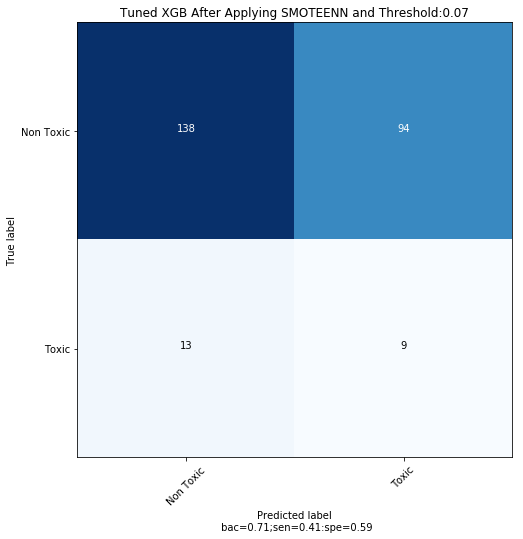

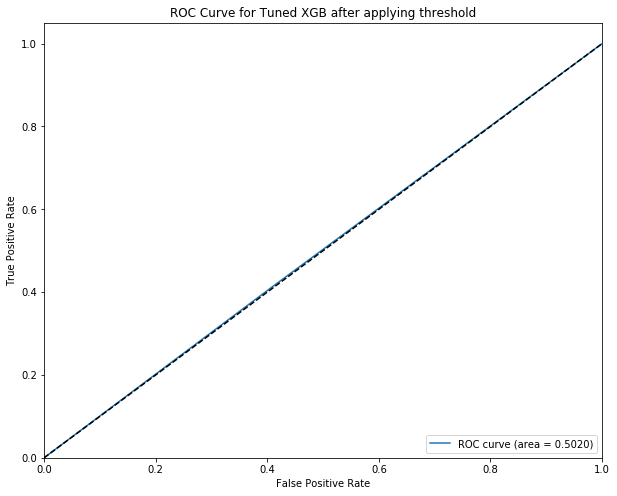

In [206]:
#LGB :: 
lgb_model_clf_train = do_lgb_on_sampled_data(data_frame_train_X,data_frame_target_train,regression=False)

cm,predictions,test_Y = predict_and_create_cm(lgb_model_clf_train,test_X,target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for lightGBM: ' , round(balanced_accuracy,2)*100)
print('MCC for lightGBM: ' , mcc_coef)
print('ROC : ' , roc_score)
print('Confusion Matrix: ')
print(cm)
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

test_Y = convert_to_encoding(target_test) 
probs_xgb_grid_searched_dose_thres = predict_proba_model(lgb_model_clf_train,test_X)
threshold = round(find_best_cut_off(test_Y,probs_xgb_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)


probs_rf_grid_searched_dose_thres = predict_proba_model(lgb_model_clf_train,test_X)
predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')



cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)

balanced_accuracy = recall_score(predicted_grid_searched_dose_thres,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for XGB: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN and Threshold:'+str(threshold))



draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned XGB after applying threshold')

In [9]:
#calling SMOTE to perform sampling without taking cox consideration
X_res_train,Y_res_train = do_sampling_smote(train_X,target_train,sampling_strategy = 'not minority',smoteenn=True)
#print(sorted(Counter(y_res).items()))
print('Resampled dataset shape for training set:  %s' % Counter(Y_res_train))

X_res_test,Y_res_test = do_sampling_smote(test_X,target_test,sampling_strategy = 'not minority',smoteenn=True)
print('Resampled dataset shape for testing set: %s' % Counter(Y_res_test))

#train_X_temp,train_temp_y,test_X_temp,test_temp_y = prepare_data_set_cox_analysis()
#X_res_cox_train,Y_res_cox_train = do_sampling_smote(train_X_temp,train_temp_y,sampling_strategy = 'not minority',smoteenn=True)
#print('Resampled dataset shape for training set -- Cox Analysis:  %s' % Counter(Y_res_train))

Resampled dataset shape for training set:  Counter({1: 286, 0: 153})
Resampled dataset shape for testing set: Counter({1: 218, 0: 125})


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Balanced Accuracy for RF:  51.0
MCC for RF:  0.013647085700497679
ROC :  51.0
Confusion Matrix: 
Sensitivity: 0.05: and Specificity:0.82

The AUC is : 0.5090


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


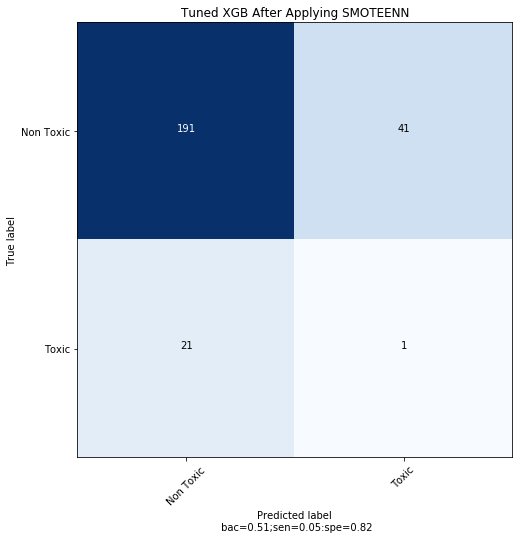

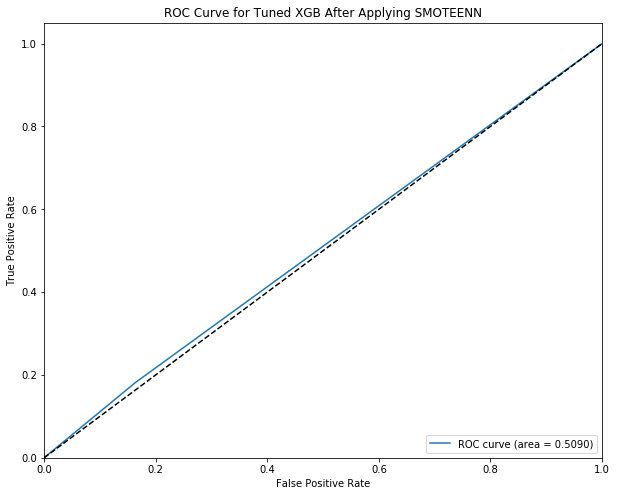

ROC :  0.509012539184953


In [338]:
#xgb_tuned = xgb.XGBClassifier(max_depth=20, n_estimators=200,min_child_weight= 1, learning_rate=0.2,subsample=0.6,
#colsample_bytree=0.8,gamma=1,eval_metric='logloss',scale_pos_weight=1.8)

test_X_matrix = test_X.as_matrix()

#xgb_model_clf_train = xgb.XGBClassifier(max_depth=20, n_estimators=200,min_child_weight= 1, learning_rate=0.2,subsample=0.6,
#colsample_bytree=0.8,gamma=1,eval_metric='auc')
#{'n_estimators': 400, 'colsample_bytree': 0.6, 'min_child_weight': 1, 'subsample': 0.6, 'eval_metric': 'auc', 'scale_pos_weight': 1.8, 'learning_rate': 0.02, 'gamma': 0.5, 'max_depth': 20}

#trained on the month dataset
xgb_model_clf_train = xgb.XGBClassifier(max_depth=20, n_estimators=400,min_child_weight= 1, learning_rate=0.02,subsample=0.6,
colsample_bytree=0.6,gamma=0.5,eval_metric='auc')


test_Y = convert_to_encoding(target_test) 
xgb_model_clf_train.fit(data_frame_train_X.as_matrix(), data_frame_target_train)
predictions = xgb_model_clf_train.predict(test_X.as_matrix())
cm = confusion_matrix(encoded_y, predictions)
balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN')

draw_roc_curve(test_Y,predictions,'Tuned XGB After Applying SMOTEENN')
roc_score = roc_auc_score (test_Y,predictions)
print('ROC : ' , roc_score)

Optimal cut-off value: 0.12
Balanced Accuracy for XGB:  42.0
MCC for RF:  -0.09497208144497025
ROC :  42.0
Confusion Matrix: 
Sensitivity: 0.27: and Specificity:0.56

The AUC is : 0.4165


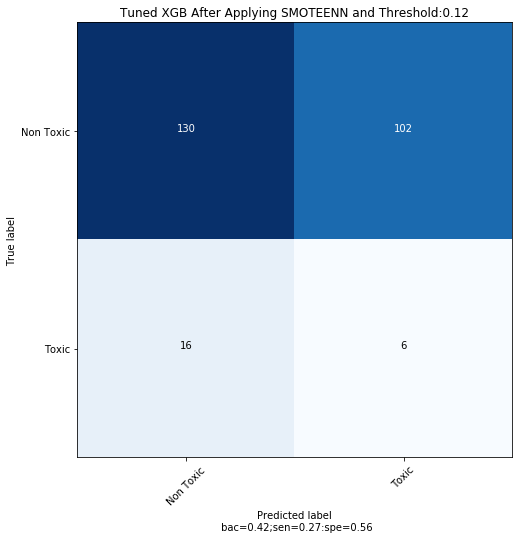

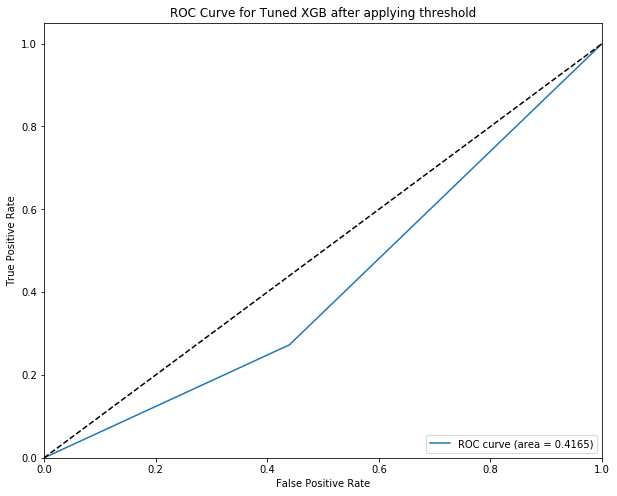

In [340]:
test_Y = convert_to_encoding(target_test) 
probs_xgb_grid_searched_dose_thres = predict_proba_model(xgb_model_clf_train,test_X_matrix)
threshold = round(find_best_cut_off(test_Y,probs_xgb_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)

predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')



cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)

balanced_accuracy = recall_score(test_Y,predicted_grid_searched_dose_thres, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for XGB: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN and Threshold:'+str(threshold))



draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned XGB after applying threshold')

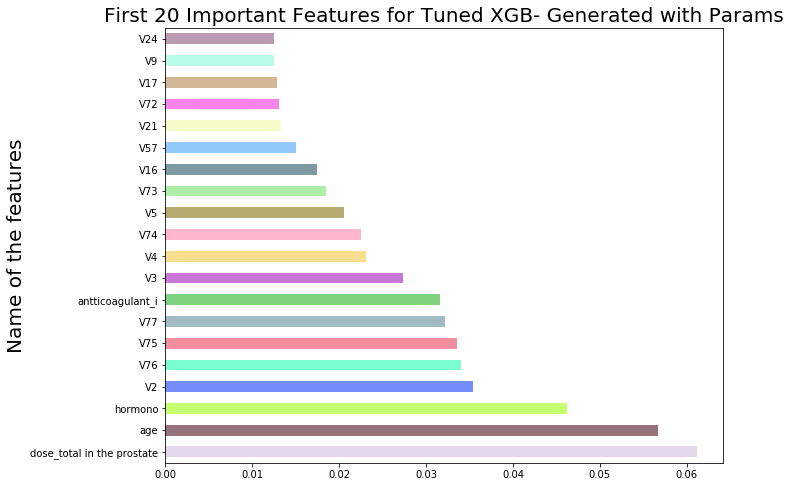

In [273]:
title = 'Tuned XGB- Generated with Params'
#number_features = 20(xgb_model_clf_train,test_X.as_matrix(),target_test)
plot_feature_importances(xgb_model_clf_train,data_frame_train_X,number_features,title)

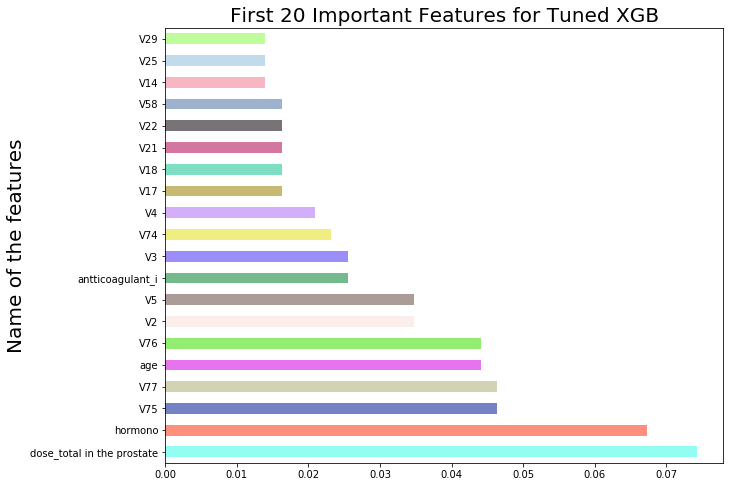

In [180]:
title = 'Tuned XGB'
number_features = 20
plot_feature_importances(xgb_model_clf_train,data_frame_train_X,number_features,title)

In [341]:
#PSEUDO LABELING AND MERGING ONLY USING RF
merged_df_xgb= create_merged_data_frame(xgb_model_clf_train,test_X,0.5,data_frame_train_X,data_frame_target_train,data_frame_train_X.columns,True)
merged_df_xgb = shuffle(merged_df_xgb)
merged_df_xgb.drop_duplicates(keep='first', inplace=True)
merged_df_xgb.shape 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(862, 87)

In [342]:
#merged data frame 
list_of_dfs = [merged_df_xgb]
#merged_df = merge_dataframe_only(list_of_dfs)

#merged_df = merged_df_mv
#print(merged_df.shape)

#no,yes = get_single_count_from_data_frame (merged_dataframe_three,'36months')
#print('No Toxicity: ',no)
#print('Toxicity: ',yes)

augmented_x,augmented_test_y = pop_labels(merged_df_xgb,'36months')
X_res_train_augmented,Y_res_train_augmented = do_sampling_smote(augmented_x,augmented_test_y,sampling_strategy = 'not minority',smoteenn=True)
#print(sorted(Counter(y_res).items()))
print('Resampled dataset shape for training set:  %s' % Counter(Y_res_train_augmented))

Resampled dataset shape for training set:  Counter({1: 449, 0: 303})


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Balanced Accuracy for XGB:  50.0
MCC for RF:  -0.006486914612338856
ROC :  50.0
Confusion Matrix: 
[[177  55]
 [ 17   5]]
Sensitivity: 0.23: and Specificity:0.76

The AUC is : 0.4951


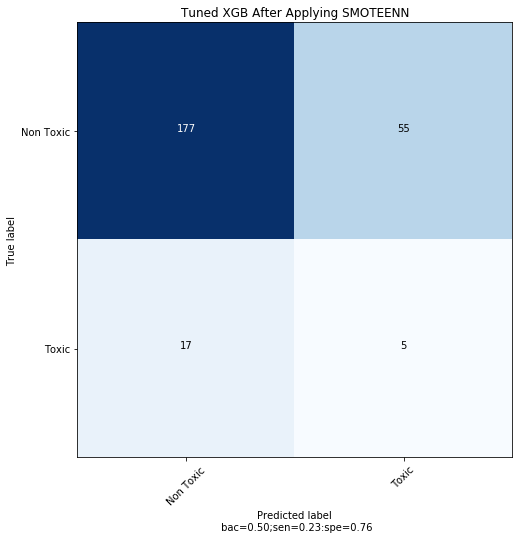

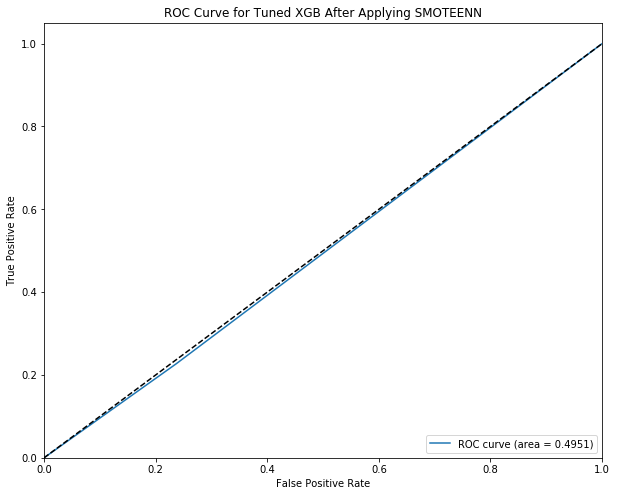

ROC :  0.495101880877743


In [345]:
#xgb_pseudo = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)

test_X_matrix = test_X.as_matrix()
#xgb_pseudo = xgb.XGBClassifier(max_depth=20, n_estimators=200,min_child_weight= 1, learning_rate=0.2,subsample=0.6,
#colsample_bytree=0.8,gamma=1,eval_metric='auc')

xgb_pseudo =xgb.XGBClassifier(max_depth=20, n_estimators=400,min_child_weight= 1, learning_rate=0.02,subsample=0.6,
colsample_bytree=0.6,gamma=0.5,eval_metric='auc',scale_pos_weight=1.8)


#xgb_pseudo.fit(augmented_x.as_matrix(), augmented_test_y)
xgb_pseudo.fit(X_res_train_augmented, Y_res_train_augmented)
#rf_pseudo.fit(X_res_train_augmented,Y_res_train_augmented)
cm,predictions,test_Y = predict_and_create_cm(xgb_pseudo,test_X_matrix,target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for XGB: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
print(cm)
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN')

draw_roc_curve(test_Y,predictions,'Tuned XGB After Applying SMOTEENN')
roc_score = roc_auc_score (test_Y,predictions)
print('ROC : ' , roc_score)

Optimal cut-off value: 0.02
Balanced Accuracy for XGB:  75.0
MCC for RF:  0.07307345375250476
ROC :  56.00000000000001
Confusion Matrix: 
Sensitivity: 0.59: and Specificity:0.54

The AUC is : 0.5649


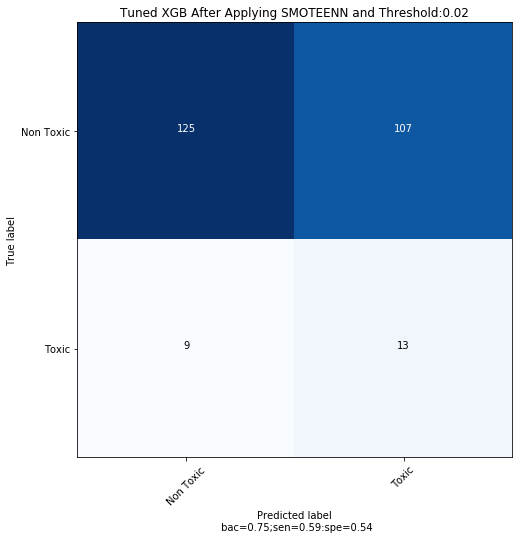

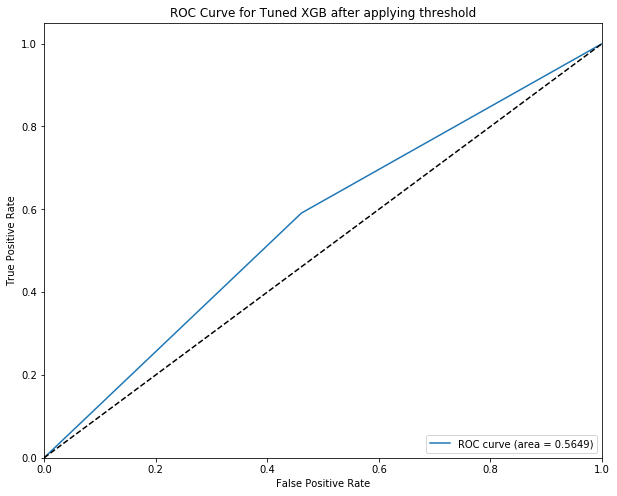

In [346]:
test_Y = convert_to_encoding(target_test) 
probs_xgb_grid_searched_dose_thres = predict_proba_model(xgb_pseudo,test_X_matrix)
threshold = round(find_best_cut_off(test_Y,probs_xgb_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)


probs_rf_grid_searched_dose_thres = predict_proba_model(xgb_pseudo,test_X_matrix)
predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')



cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)

balanced_accuracy = recall_score(predicted_grid_searched_dose_thres,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for XGB: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned XGB After Applying SMOTEENN and Threshold:'+str(threshold))



draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned XGB after applying threshold')

Balanced Accuracy for RF:  52.0
MCC for RF:  0.03539265871504028
ROC :  52.0
Confusion Matrix: 
Sensitivity: 0.18: and Specificity:0.86

The AUC is : 0.5219


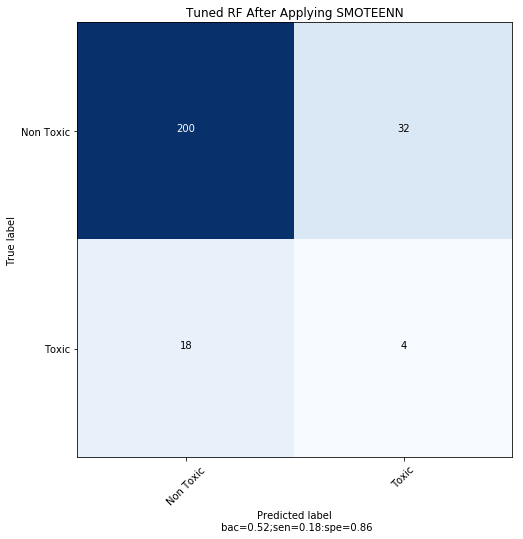

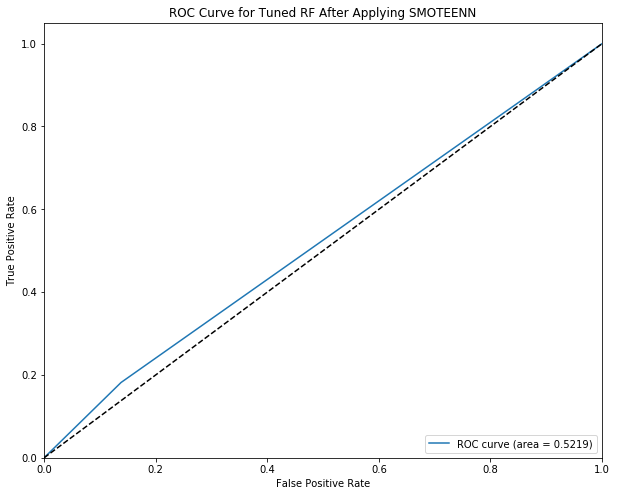

ROC :  0.5219435736677116


In [246]:
#rf_ = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)
rf_ = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=3,min_samples_split=10,n_estimators=100,random_state=RANDOM_STATE_VALUE)

#rf_ = RandomForestClassifier(n_estimators=500,random_state=RANDOM_STATE_VALUE)
#rf_.fit(X_res_train, Y_res_train)
rf_.fit(data_frame_train_X, data_frame_target_train)

cm,predictions,test_Y = predict_and_create_cm(rf_,test_X,target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned RF After Applying SMOTEENN')

draw_roc_curve(test_Y,predictions,'Tuned RF After Applying SMOTEENN')
roc_score = roc_auc_score (test_Y,predictions)
print('ROC : ' , roc_score)

Optimal cut-off value: 0.26
Balanced Accuracy for RF:  67.0
MCC for RF:  0.18890829981504484
ROC :  67.0
Confusion Matrix: 
Sensitivity: 0.86: and Specificity:0.47

The AUC is : 0.6667


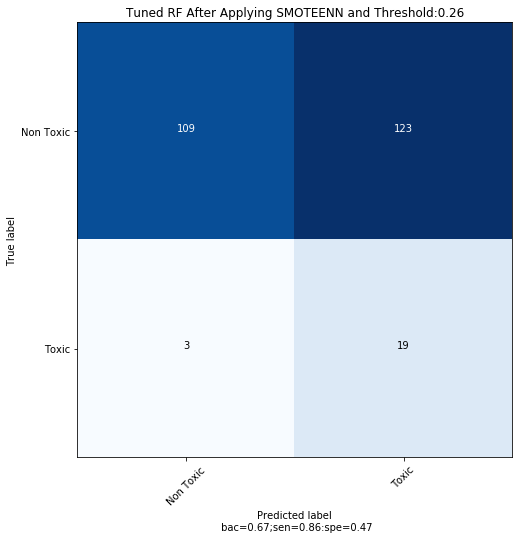

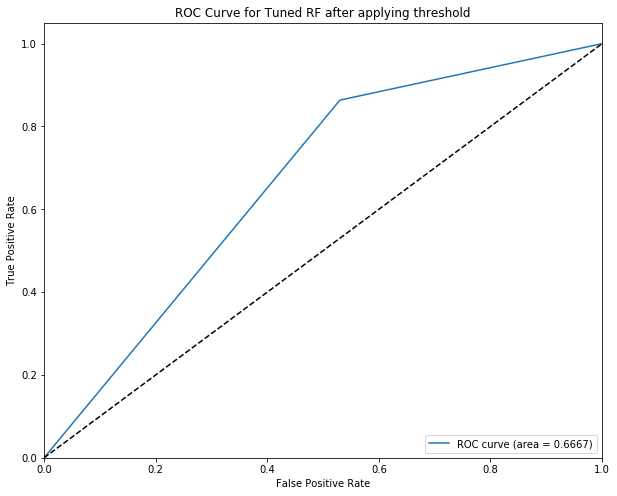

In [247]:
test_Y = convert_to_encoding(target_test) 
probs_rf_grid_searched_dose_thres = predict_proba_model(rf_,test_X)
threshold = round(find_best_cut_off(test_Y,probs_rf_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)
#threshold = find_best_cut_off(test_Y,predictions)

predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')

cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)

balanced_accuracy = recall_score(test_Y,predicted_grid_searched_dose_thres, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned RF After Applying SMOTEENN and Threshold:'+str(threshold))



draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned RF after applying threshold')


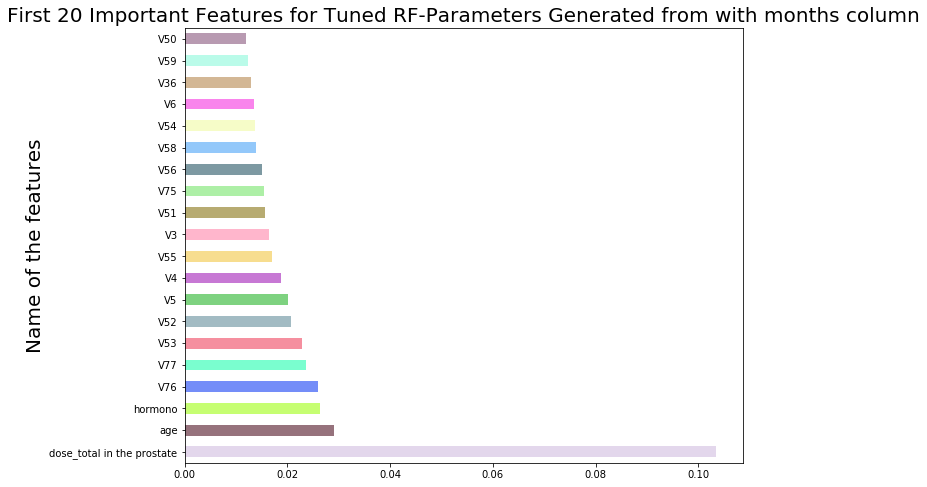

In [248]:
title = 'Tuned RF-Parameters Generated from with months column'
number_features = 20
plot_feature_importances(rf_,data_frame_train_X,number_features,title)

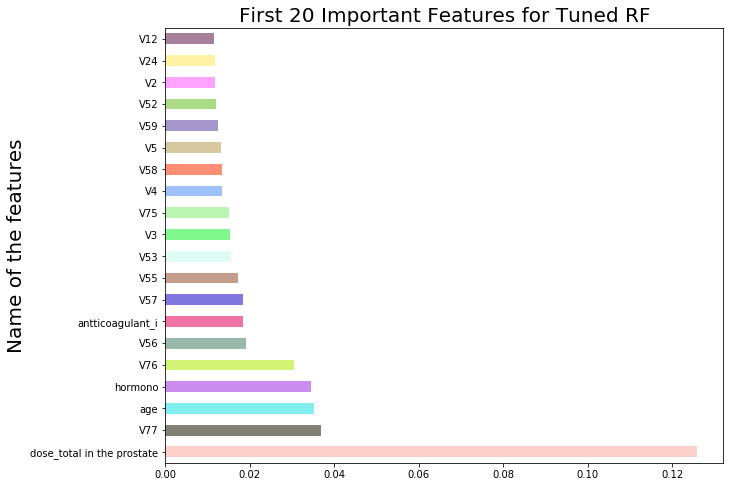

In [37]:
title = 'Tuned RF'
number_features = 20
plot_feature_importances(rf_,data_frame_train_X,number_features,title)

In [173]:
data_frame_train_X.head(2)

,age,antticoagulant_i,hormono,dose_total in the prostate,"imrt_only (0=no, 1=yes)",imr_plus_igrt,V0,V1= Volume of the rectum in % receiving a minimum of 1 Gy,V2,V3,...,V71,V72,V73,V74,V75,V76,V77,V78,V79,36months
0,72.164384,0.0,1.0,80.0,1.0,0.0,100.0,100.0,99.9566,98.8444,...,11.27140,9.64263,7.96289,6.16313,3.26700,0.244925,0.0,0.0,0.0,0
1,76.000000,0.0,0.0,80.0,1.0,0.0,100.0,100.0,99.7233,98.3018,...,7.19165,6.19770,5.15940,3.95015,2.35319,0.496864,0.0,0.0,0.0,0


In [171]:
important_features_list = get_important_features_list(rf_,data_frame_train_X.columns,20)
important_features_list
#xgb_pseudo rf_pseudo

ValueError: Length of passed values is 86, index implies 87

In [41]:
headers = ["name", "score"]
values = sorted(zip(data_frame_train_X.columns, rf_.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

NameError: name 'tabulate' is not defined

In [249]:
#PSEUDO LABELING AND MERGING ONLY USING RF
merged_df_rf = create_merged_data_frame(rf_,test_X,0.5,data_frame_train_X,data_frame_target_train,data_frame_train_X.columns,False)
merged_df_rf = shuffle(merged_df_rf)
merged_df_rf.drop_duplicates(keep='first', inplace=True)
merged_df_rf.shape 

(862, 87)

In [250]:
#merged data frame 
list_of_dfs = [merged_df_rf]
#merged_df = merge_dataframe_only(list_of_dfs)

#merged_df = merged_df_mv
#print(merged_df.shape)

#no,yes = get_single_count_from_data_frame (merged_dataframe_three,'36months')
#print('No Toxicity: ',no)
#print('Toxicity: ',yes)

augmented_x,augmented_test_y = pop_labels(merged_df_rf,'36months')
X_res_train_augmented,Y_res_train_augmented = do_sampling_smote(augmented_x,augmented_test_y,sampling_strategy = 'not minority',smoteenn=True)
#print(sorted(Counter(y_res).items()))
print('Resampled dataset shape for training set:  %s' % Counter(Y_res_train_augmented))

Resampled dataset shape for training set:  Counter({1: 463, 0: 314})


Balanced Accuracy for RF:  53.0
MCC for RF:  0.049160322639420884
ROC :  53.0
Confusion Matrix: 
[[212  20]
 [ 19   3]]
Sensitivity: 0.14: and Specificity:0.91

The AUC is : 0.5251


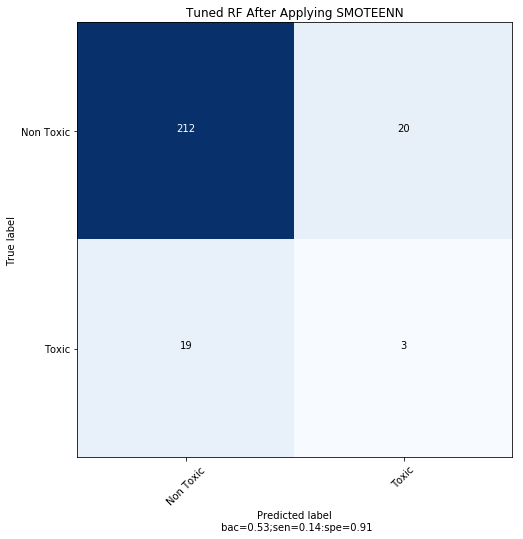

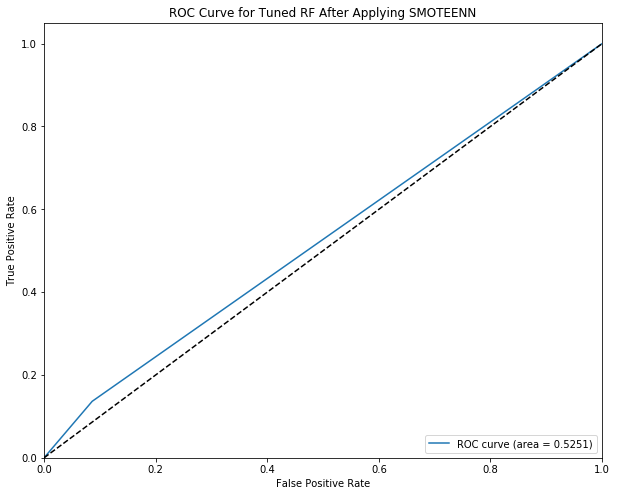

ROC :  0.525078369905956


In [254]:
#rf_pseudo = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=8,n_estimators=300,random_state=RANDOM_STATE_VALUE)
rf_pseudo = RandomForestClassifier(bootstrap= True,criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=3,min_samples_split=10,n_estimators=100,random_state=RANDOM_STATE_VALUE)


#rf_pseudo.fit(augmented_x, augmented_test_y)
rf_pseudo.fit(X_res_train_augmented,Y_res_train_augmented)
cm,predictions,test_Y = predict_and_create_cm(rf_pseudo,test_X,target_test)

balanced_accuracy = recall_score(test_Y,predictions, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predictions)
roc_score = roc_auc_score (test_Y,predictions)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
print(cm)
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned RF After Applying SMOTEENN')

draw_roc_curve(test_Y,predictions,'Tuned RF After Applying SMOTEENN')
roc_score = roc_auc_score (test_Y,predictions)
#print('Optimal cut-off value:' , threshold)
print('ROC : ' , roc_score)

Optimal cut-off value: 0.11
Balanced Accuracy for RF:  60.0
MCC for RF:  0.11461935926707155
ROC :  60.0
Confusion Matrix: 
Sensitivity: 0.55: and Specificity:0.65

The AUC is : 0.5982


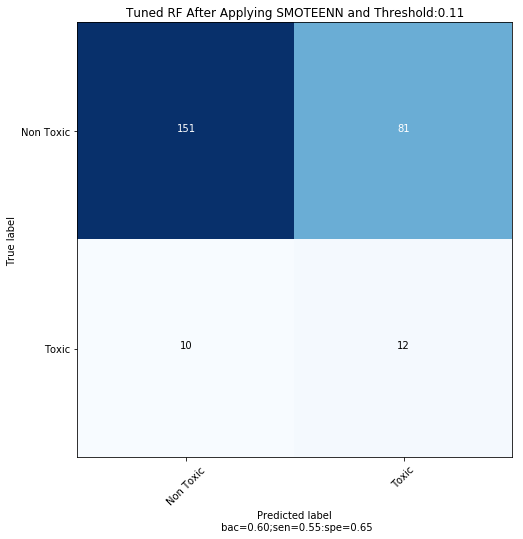

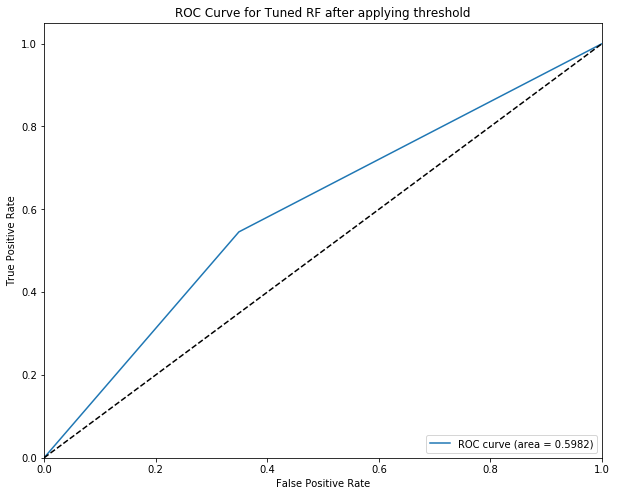

In [255]:
test_Y = convert_to_encoding(target_test) 
probs_rf_grid_searched_dose_thres = predict_proba_model(rf_pseudo,test_X)
threshold = round(find_best_cut_off(test_Y,probs_rf_grid_searched_dose_thres),2)
print('Optimal cut-off value:' , threshold)


predicted_grid_searched_dose_thres = (probs_rf_grid_searched_dose_thres [:,1] >= threshold).astype('int')

cm = confusion_matrix(test_Y, predicted_grid_searched_dose_thres)

balanced_accuracy = recall_score(test_Y,predicted_grid_searched_dose_thres, average='macro') 
mcc_coef= matthews_corrcoef(test_Y, predicted_grid_searched_dose_thres)
roc_score = roc_auc_score (test_Y,predicted_grid_searched_dose_thres)

print('Balanced Accuracy for RF: ' , round(balanced_accuracy,2)*100)
print('MCC for RF: ' , mcc_coef)
print('ROC : ' , round(roc_score,2)*100)
print('Confusion Matrix: ')
sensititvity,specificity = calculate_custom_sensitivity(cm)
print("Sensitivity: {:0.2f}: and Specificity:{:0.2f}".format(sensititvity,specificity))

fig, ax = plt.subplots(ncols=1,figsize=(8,8))
plot_confusion_matrix_with_report(cm, classes=['Non Toxic', 'Toxic'],ax=ax,bc=balanced_accuracy,
                      title='Tuned RF After Applying SMOTEENN and Threshold:'+str(threshold))


#threshold = find_best_cut_off(test_Y,predictions)


draw_roc_curve(test_Y,predicted_grid_searched_dose_thres,'Tuned RF after applying threshold')

In [193]:
train_temp_y.shape

(606, 2)

In [195]:
data_frame_cox_target.shape

(609, 2)

In [196]:
#SURVIVAL ANALYSIS
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis
#switching column values
train_temp_y = data_frame_cox_target[['36months','months']]

train_temp_y['36months']= train_temp_y['36months'].astype('bool')

#train_temp_y.head()
#converting into recorded array
data_clinical_train_Y = train_temp_y.to_records(index=False)
#data_clinical_train_Y

#switching column values for testing set
test_temp_y = test_cox_y[['36months','months']]
#test_temp_y.head()
#converting into recorded array
data_clinical_test_Y = test_temp_y.to_records(index=False)
#data_clinical_test_Y

In [203]:
important_features_list = get_important_features_list(xgb_model_clf_train,data_frame_train_X.columns,65)

#xgb_pseudo rf_pseudo

from sklearn.preprocessing import minmax_scale


data_frame_train_cox=data_frame_train_X.copy()
data_frame_train_cox=data_frame_train_cox[important_features_list]
data_frame_train_cox.head(2)


train_scaled = minmax_scale(data_frame_train_cox, axis = 0)
#test_scaled = minmax_scale(test_X, axis = 0)
train_scaled_df = pd.DataFrame(train_scaled,columns=data_frame_train_cox.columns)

#data_clinical_train
data_train_numeric = OneHotEncoder().fit_transform(data_frame_train_cox) #scaled and normal data_frame_train_cox,train_scaled_df
#data_train_numeric.head()
estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_train_numeric,data_clinical_train_Y)
#pd.Series(estimator.coef_, index=important_features_list)

from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(data_train_numeric)
result = concordance_index_censored(data_clinical_train_Y['36months'], data_clinical_train_Y["months"], prediction)
print('C-Index for training: ', round(result[0],2))
prediction.shape



data_frame_test_cox=test_cox_X.copy()
data_frame_test_cox=data_frame_test_cox[important_features_list]
#data_frame_test_cox.head(2)

test_scaled = minmax_scale(data_frame_test_cox, axis = 0)
#test_scaled = minmax_scale(test_X, axis = 0)
test_scaled_df = pd.DataFrame(test_scaled,columns=data_frame_test_cox.columns)


data_test_numeric = OneHotEncoder().fit_transform(data_frame_test_cox) # data_frame_test_cox
#data_test_numeric.head()

prediction = estimator.predict(data_test_numeric)
result = concordance_index_censored(data_clinical_test_Y['36months'], data_clinical_test_Y["months"], prediction)
print('C-Index for testing: ', round(result[0],2))

C-Index for training:  0.88
C-Index for testing:  0.43


In [134]:
from sklearn.preprocessing import minmax_scale
from sksurv.metrics import concordance_index_censored
dict_result = {}
new_dict = {}
for i in range(1,78):
    #print('NUMBER OF FEATURE: ' , i)
    #xgb_pseudo rf_pseudo
    important_features_list = get_important_features_list(rf_,data_frame_train_X.columns,i)

    data_frame_train_cox=data_frame_train_X.copy()
    data_frame_train_cox=data_frame_train_cox[important_features_list]
    data_frame_train_cox.head(2)



    train_scaled = minmax_scale(data_frame_train_cox, axis = 0)
    #test_scaled = minmax_scale(test_X, axis = 0)
    train_scaled_df = pd.DataFrame(train_scaled,columns=data_frame_train_cox.columns)

    #data_clinical_train
    data_train_numeric = OneHotEncoder().fit_transform(data_frame_train_cox) #scaled and normal data_frame_train_cox,train_scaled_df
    #data_train_numeric.head()
    estimator = CoxPHSurvivalAnalysis()
    estimator.fit(data_train_numeric,data_clinical_train_Y)
    #pd.Series(estimator.coef_, index=important_features_list)

    prediction = estimator.predict(data_train_numeric)
    result = concordance_index_censored(data_clinical_train_Y['36months'], data_clinical_train_Y["months"], prediction)
    #print('C-Index for training: ', round(result[0],2))
    prediction.shape



    data_frame_test_cox=test_cox_X.copy()
    data_frame_test_cox=data_frame_test_cox[important_features_list]
    #data_frame_test_cox.head(2)

    test_scaled = minmax_scale(data_frame_test_cox, axis = 0)
    #test_scaled = minmax_scale(test_X, axis = 0)
    test_scaled_df = pd.DataFrame(test_scaled,columns=data_frame_test_cox.columns)


    data_test_numeric = OneHotEncoder().fit_transform(data_frame_test_cox) # data_frame_test_cox
    #data_test_numeric.head()

    prediction = estimator.predict(data_test_numeric)
    result_test = concordance_index_censored(data_clinical_test_Y['36months'], data_clinical_test_Y["months"], prediction)
    #print('C-Index for testing: ', round(result_test[0],2))
    dict_result[i]=round(result_test[0],2)
    #print(dict_result)
    
score,number_of_features= max(zip(dict_result.values(), dict_result.keys()))
print("Number of features: " , number_of_features , " : and Highest C-Index is: " ,score)

Number of features:  14  : AUC Score is:  0.53


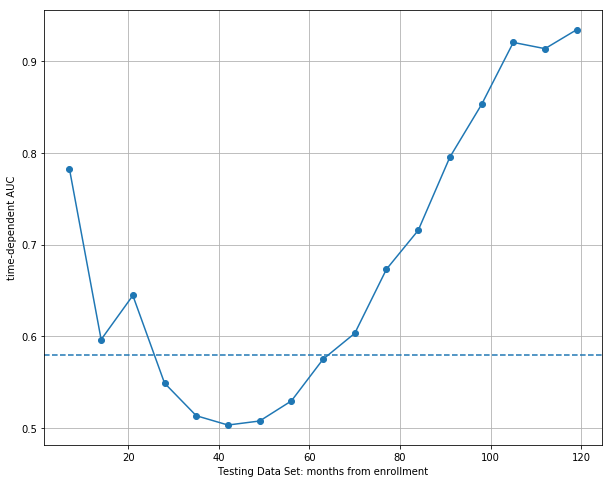

In [201]:
from sklearn.pipeline import make_pipeline
from sksurv.metrics import (concordance_index_censored,
                            concordance_index_ipcw,
                            cumulative_dynamic_auc)
cph = make_pipeline(OneHotEncoder(), CoxPHSurvivalAnalysis())
cph.fit(data_train_numeric, data_clinical_train_Y)


#to train selected : data_clinical_test_temp to all : data_clinical_train
va_times = np.arange(7, 123, 7)
# estimate performance on training data, thus use `va_y` twice.
va_auc, va_mean_auc = cumulative_dynamic_auc(data_clinical_test_Y, data_clinical_test_Y, cph.predict(data_test_numeric), va_times)

plt.plot(va_times, va_auc, marker="o")
plt.axhline(va_mean_auc, linestyle="--")
plt.xlabel("Testing Data Set: months from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [84]:
from sklearn.preprocessing import minmax_scale
train_scaled = minmax_scale(data_frame_train_cox, axis = 0)
#test_scaled = minmax_scale(test_X, axis = 0)
train_scaled_df = ata_frame_generated = pd.DataFrame(train_scaled,columns=data_frame_train_cox.columns)

In [118]:

data_frame_train_X.head(2)

,age,antticoagulant_i,hormono,dose_total in the prostate,"imrt_only (0=no, 1=yes)",imr_plus_igrt,V0,V1= Volume of the rectum in % receiving a minimum of 1 Gy,V2,V3,...,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79
0,67.676712,0.0,1.0,80.0,1.0,0.0,100.0,100.0,99.9662,98.4704,...,9.00215,8.06416,6.99087,5.8061,3.83875,0.747947,0.021814,0.000000,0.0,0.0
1,69.594521,1.0,1.0,80.0,1.0,0.0,100.0,100.0,100.0000,100.0000,...,21.41810,20.20380,18.91710,17.0446,13.60120,3.113730,0.182725,0.000993,0.0,0.0


In [90]:
pd.Series(estimator.coef_, index=important_features_list)

dose_total in the prostate   -0.622105
V77                          -0.381384
age                          -0.014501
hormono                      -0.026732
V76                           0.582194
V56                           1.917828
antticoagulant_i             -0.035298
V57                          -4.656605
V55                          -1.751096
V53                           5.971398
V3                            0.161134
V75                          -0.156616
V4                           -0.191930
V58                           3.531528
V5                           -0.073315
V59                          -0.797132
V52                          -4.113536
V2                            0.250064
V24                          -0.067070
V12                           0.070749
dtype: float64

In [100]:
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(data_train_numeric)
result = concordance_index_censored(data_clinical_train_Y['36months'], data_clinical_train_Y["months"], prediction)
print('C-Index for training: ', round(result[0],2))
prediction.shape

C-Index for training:  0.78


(606,)

In [104]:
#test_cox_X,test_cox_y 

data_frame_test_cox=test_cox_X.copy()
data_frame_test_cox=data_frame_test_cox[important_features_list]
data_frame_test_cox.head(2)


,dose_total in the prostate,V77,age,hormono,V76,V56,antticoagulant_i,V57,V55,V53,V3,V75,V4,V58,V5,V59,V52,V2,V24,V12
358,80.0,0.0,70.520548,1.0,0.734472,43.239532,0.0,42.091124,44.326677,46.435518,100.000,2.996334,100.000,40.89496,100.000,39.653199,47.742901,100.000,88.7229,96.829546
570,78.0,0.0,76.463014,0.0,0.099000,31.825000,1.0,30.648000,33.253000,35.827000,99.997,0.493000,99.996,29.35700,99.995,28.005000,37.349000,99.998,87.5060,98.936000


In [103]:
test_cox_X.shape

(254, 86)

In [105]:
data_test_numeric = OneHotEncoder().fit_transform(data_frame_test_cox)
data_test_numeric.head()

,dose_total in the prostate,V77,age,hormono,V76,V56,antticoagulant_i,V57,V55,V53,V3,V75,V4,V58,V5,V59,V52,V2,V24,V12
358,80.0,0.000000,70.520548,1.0,0.734472,43.239532,0.0,42.091124,44.326677,46.435518,100.0000,2.996334,100.000000,40.894960,100.000000,39.653199,47.742901,100.000,88.722900,96.829546
570,78.0,0.000000,76.463014,0.0,0.099000,31.825000,1.0,30.648000,33.253000,35.827000,99.9970,0.493000,99.996000,29.357000,99.995000,28.005000,37.349000,99.998,87.506000,98.936000
392,80.0,0.000000,65.002740,1.0,0.434356,17.419491,0.0,16.837044,18.001939,19.436027,100.0000,0.525880,100.000000,16.170196,100.000000,15.497617,20.477259,100.000,66.382787,97.914648
433,80.0,6.103625,66.564384,0.0,10.983656,36.833878,0.0,35.932493,38.165662,39.450743,99.9757,15.577742,97.718997,35.494800,97.180679,33.348255,39.981800,100.000,80.301524,92.534924
411,80.0,6.632189,62.123288,0.0,8.305008,32.086030,0.0,31.602299,33.903786,37.270691,100.0000,8.429231,100.000000,30.404630,100.000000,28.285456,45.067220,100.000,100.000000,100.000000


In [96]:
data_clinical_test_Y['36months']

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [102]:
data_test_numeric.shape

(606, 20)

In [106]:
prediction = estimator.predict(data_test_numeric)
prediction.shape

(254,)

In [107]:
prediction = estimator.predict(data_test_numeric)
result = concordance_index_censored(data_clinical_test_Y['36months'], data_clinical_test_Y["months"], prediction)
print('C-Index for testing: ', round(result[0],2))

C-Index for testing:  0.43


In [263]:
params = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators':[100,200,400],
        'max_depth': [10,20,30],
        'scale_pos_weight':[1.8,2.50,3.5],
        'eval_metric':['auc'],         
        'learning_rate':[0.01,0.02,0.1, 0.2]
        }

scorers = {
    'roc_score': make_scorer(roc_auc_score),
    #'recall_score': make_scorer(recall_score),
    #'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
}
#
refit_score = 'roc_score'
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=RANDOM_STATE_VALUE)


In [264]:
#xgb_grid = XGBClassifier()
xgb_grid = XGBClassifier(**params)
grid_xgb = GridSearchCV(estimator=xgb_grid,param_grid=param_grid, scoring=scorers,n_jobs=4, cv=kfold,verbose=1,refit=refit_score)
grid_xgb.fit(data_frame_train_X,data_frame_target_train)

Fitting 10 folds for each of 3888 candidates, totalling 38880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   30.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 16.4mi

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=[0.6, 0.8, 1.0], eval_metric=['auc'],
       gamma=[0.5, 1], learning_rate=[0.01, 0.02, 0.1, 0.2],
       max_delta_step=0, max_depth=[10, 20, 30], min_child_weight=[1, 5],
       missing=None, n_e...ambda=1, scale_pos_weight=[1.8, 2.5, 3.5], seed=None,
       silent=True, subsample=[0.6, 0.8, 1.0]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [400, 600, 1000], 'colsample_bytree': [0.6, 0.8, 1.0], 'min_child_weight': [1, 5], 'subsample': [0.6, 0.8, 1.0], 'gamma': [0.5, 1], 'eval_metric': ['auc'], 'scale_pos_weight': [1.8, 1.9, 2.0], 'learning_rate': [0.02, 0.1, 0.2, 0.3], 'max_depth': [20, 50, 100]},
       pre_dispatch='2*n_jobs', refit='roc_score',
       return_train_score='warn',
       scoring={'roc_score': make_scorer(

In [265]:
print('Best Params: ' , grid_xgb.best_params_)
print('Best Estimators: ' ,grid_xgb.best_estimator_)
print('Best Index: ' ,grid_xgb.best_index_)
print('Best Results: ' ,grid_xgb.cv_results_)

Best Params:  {'n_estimators': 400, 'colsample_bytree': 0.6, 'min_child_weight': 1, 'subsample': 0.6, 'eval_metric': 'auc', 'scale_pos_weight': 1.8, 'learning_rate': 0.02, 'gamma': 0.5, 'max_depth': 20}
Best Estimators:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eval_metric=['auc'], gamma=0.5,
       learning_rate=0.02, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1.8, seed=None,
       silent=True, subsample=0.6)
Best Index:  0
Best Results:  {'split4_train_roc_score': array([1., 1., 1., ..., 1., 1., 1.]), 'split8_test_roc_score': array([1., 1., 1., ..., 1., 1., 1.]), 'split2_test_roc_score': array([1., 1., 1., ..., 1., 1., 1.]), 'param_scale_pos_weight': masked_array(data=[1.8, 1.8, 1.8, ..., 2.0, 2.0, 2.0],
             mask=[False, False, False, ..., False,

In [289]:
#Grid Search random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=RANDOM_STATE_VALUE)
param_grid = { 
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,30,40,50,60,70,80,90,100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,150,200,250,300,400,500],
    'criterion' :['gini', 'entropy']
}
#multiple evaluation scoring
#scores = ['recall','balanced_accuracy']
scorers = {
    #'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
}

refit_score = 'recall_score'
#clf = GridSearchCV(rfc, param_grid, cv=5,refit='balanced_accuracy',
                       #scoring=scores,verbose=5)
    
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=RANDOM_STATE_VALUE)    
rf_grid = GridSearchCV(rfc, param_grid, cv=kfold,scoring=scorers,verbose=1,refit=refit_score)
#rf_grid.fit(data_frame_train_X,data_frame_target_train)
#rf_grid.fit(augmented_x, augmented_test_y) #raw pseudo labeled dataframe
rf_grid.fit(X_res_train_augmented,Y_res_train_augmented) #applied smoteenn on the merged dataframe

Fitting 10 folds for each of 3402 candidates, totalling 34020 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 34020 out of 34020 | elapsed: 410.6min finished
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 4, 5], 'bootstrap': [True], 'n_estimators': [100, 150, 200, 250, 300, 400, 500], 'min_samples_split': [8, 10, 12], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn',
       scor

In [290]:
print('Best Params: ' , rf_grid.best_params_)
print('Best Estimators: ' ,rf_grid.best_estimator_)
print('Best Index: ' ,rf_grid.best_index_)
print('Best Results: ' ,rf_grid.cv_results_)

Best Params:  {'min_samples_leaf': 5, 'bootstrap': True, 'n_estimators': 500, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 'auto', 'max_depth': 20}
Best Estimators:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)
Best Index:  1749
Best Results:  {'split7_test_recall_score': array([1., 1., 1., ..., 1., 1., 1.]), 'mean_test_recall_score': array([0.98236584, 0.98237694, 0.98017365, ..., 0.98678026, 0.98455804,
       0.98678026]), 'split6_test_recall_score': array([0.97777778, 0.97777778, 0.97777778, ..., 1.        , 1.        ,
       1.        ]), 'split6_test_balanced_accuracy_score': array([0.9

In [ ]:
BEST PARAM OF RF BASED ON MERGED DATA FRAME only FROM RF and XGB:
    Best Params:  {'min_samples_leaf': 4, 'bootstrap': True, 'n_estimators': 100, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 'auto', 'max_depth': 20}
    
BEST PARAM OF RF BASED ON MERGED DATA FRAME only FROM RF and XGB:(With Augmentation)
    {'min_samples_leaf': 5, 'bootstrap': True, 'n_estimators': 500, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 'auto', 'max_depth': 20}
    

In [307]:
#Grid Search random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#finding best parameter for xgb
params = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators':[200,400,600,1000],
        'max_depth': [20,50],
        'scale_pos_weight':[1.8,2.50,3.5],
        'eval_metric':['auc'],         
        'learning_rate':[0.001, 0.01,0.02,0.1, 0.2, 0.3]
        }

scorers = {
    'roc_score': make_scorer(roc_auc_score),
    #'recall_score': make_scorer(recall_score),
    #'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
}
#
refit_score = 'roc_score'
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=RANDOM_STATE_VALUE)
    
xgb_grid = XGBClassifier()
xgb_grid = GridSearchCV(estimator=xgb_grid, param_grid=param_grid, scoring=scorers,n_jobs=4, cv=kfold,verbose=1,refit=refit_score)
xgb_grid.fit(data_frame_train_X,data_frame_target_train)
#rf_grid.fit(augmented_x, augmented_test_y) #raw pseudo labeled dataframe
#rf_grid.fit(X_res_train_augmented,Y_res_train_augmented) #applied smoteenn on the merged dataframe

Fitting 10 folds for each of 3402 candidates, totalling 34020 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter criterion for estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1). Check the list of available parameters with `estimator.get_params().keys()`.